In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_exp_sum(i, c):
    summ = 0
    exp_seq = []
    for k in range(i):
        exp_seq.append(np.exp(-c*(i-k+1)))
        summ += np.exp(-c*(i-k+1))
    exp_seq = exp_seq/summ
    return exp_seq


def exp_weight(seq, decay=1):
    result = [float(seq[0])]
    for i in range(1,len(seq)):
        exp_seq = get_exp_sum(i, decay)
        w_sum = 0
        for j in range(i):
            w_sum += seq[j] * exp_seq[j]
        result = result + [w_sum]
    return result

In [3]:
def score_function(casualities):
    return list(np.tanh(((casualities-exp_weight(list(casualities),0.5))/exp_weight(list(casualities),0.5))))
def score_function_non_exponential(casualities):
    return list(np.tanh(((casualities-pd.Series(casualities).expanding().mean())/pd.Series(casualities).expanding().mean())))

In [4]:
test_df_coun=pd.read_csv(r"casuality_country_list.csv")

In [5]:
test_df_coun.head()

,Country,Year,Number of Crisis,Number of Casualty,Crisis Occurred
0,Cameroon,1997,14,6,1
1,Cameroon,1998,6,8,1
2,Cameroon,1999,2,1,1
3,Cameroon,2000,8,16,1
4,Cameroon,2001,5,4,1


In [6]:
score_obj=pd.DataFrame(test_df_coun.groupby('Country')['Number of Casualty'].apply(lambda x: score_function(x)))
score_obj_2=pd.DataFrame(test_df_coun.groupby('Country')['Number of Casualty'].apply(lambda x: score_function_non_exponential(x)))

In [7]:
for scores_list in score_obj['Number of Casualty']:
    scores_list=(pd.Series(scores_list)).fillna(0)
for scores_list in score_obj_2['Number of Casualty']:
    scores_list=(pd.Series(scores_list)).fillna(0)

In [8]:
all_scores=[]
all_scores_2=[]
for score_list in score_obj['Number of Casualty']:
    for scores in score_list:
        all_scores.append(scores)
for score_list in score_obj_2['Number of Casualty']:
    for scores in score_list:
        all_scores_2.append(scores)

In [9]:
test_df_coun['scores']=all_scores
test_df_coun['scores_nonexp']=all_scores_2

In [10]:
ncols=2
nrows=10
grouped_by=test_df_coun.groupby('Country')
print(grouped_by)

In [11]:
#change here to have plot of diff country
print(test_df_coun['Country'].unique())
Country="Guinea"

['Cameroon' 'Burkina Faso' 'Chad' 'Gambia' 'Guinea' 'Mali' 'Mauritania'
 'Niger' 'Nigeria' 'Senegal']


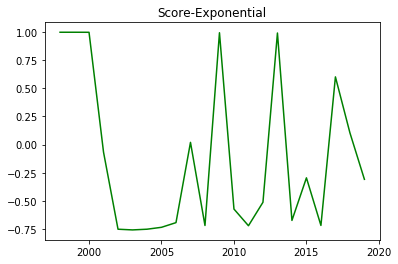

In [12]:
plt.title("Score-Exponential")
df_coun=test_df_coun[test_df_coun['Country']==Country]
plt.plot(df_coun['Year'],df_coun['scores'],color='g')

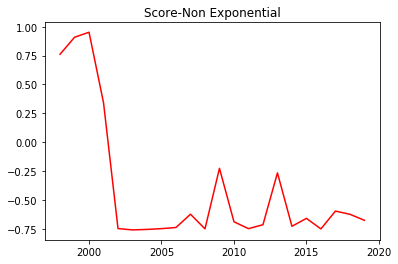

In [13]:
plt.title("Score-Non Exponential")
df_coun=test_df_coun[test_df_coun['Country']==Country]
plt.plot(df_coun['Year'],df_coun['scores_nonexp'],color='r')

In [17]:
import numpy as np
import pandas as pd
Election_date=pd.read_csv(r"Plot_election_date.csv")
new=pd.merge(test_df_coun[test_df_coun['Country']==Country],Election_date[Election_date['Country']==Country],how='inner')

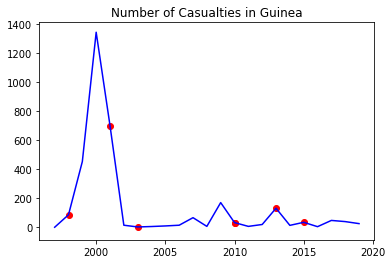

In [18]:
plt.title(f"Number of Casualties in {Country}")
plt.plot(df_coun['Year'],df_coun['Number of Casualty'],color='b')
plt.scatter(new['Year'],new['Number of Casualty'],color='r')

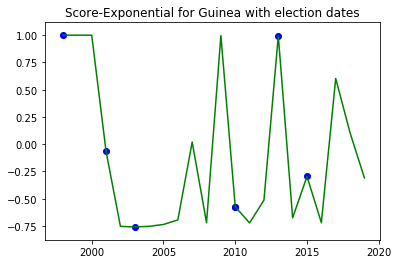

In [19]:
plt.title(f"Score-Exponential for {Country} with election dates")
df_coun=test_df_coun[test_df_coun['Country']==Country]
plt.plot(df_coun['Year'],df_coun['scores'],color='g')
plt.scatter(new['Year'],new['scores'],color='b')

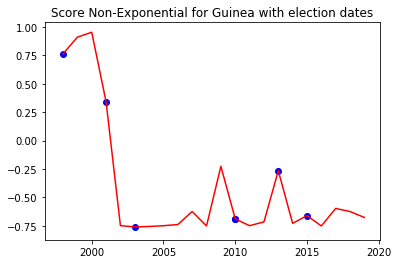

In [20]:
plt.title(f"Score Non-Exponential for {Country} with election dates")
df_coun=test_df_coun[test_df_coun['Country']==Country]
plt.plot(df_coun['Year'],df_coun['scores_nonexp'],color='r')
plt.scatter(new['Year'],new['scores_nonexp'],color='b')